In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
from nuforc_csv_to_pandas import scrub

#Read in UFO CSV file as a dataframe
ufo_data = scrub()

In [2]:
'''
Moved cleaning to scrub module of nuforc_csv_to_pandas.py and imported above.

US_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
#only use data table rows that are US states
ufo_data = ufo_data[ufo_data.State.apply(lambda x: x in US_states)]

#City data field cleaning
ufo_data = ufo_data[ufo_data.City.apply(lambda x: type(x) == str)] #ensure city data value is a string
ufo_data['City'] = ufo_data['City'].apply(lambda x: x.lower())  #make capitalization consistent
#ufo_data['City'] = ufo_data['City'].apply(lambda x: x.replace('(.*).*','')) #didn't properly remove () see index 67 for new york city (brooklyn)
ufo_data['City'] = ufo_data['City'].apply(lambda x: re.sub(r'/(.*).+/','',x))
#ufo_data['City'] = ufo_data['City'][0] + ufo_data['City'].lower()[1:]
'''

ufo_data.head()

,Date_Time,City,State,Shape,Duration,Summary,Posted,Duration_Mins,Year,Month,Day_Of_Month,Day_Of_Week,Timestamp
0,2021-05-19 20:15:00,atlanta,GA,sphere,10 min,Two black UFO over Atlanta one coming close to...,2021-05-20,10.0,2021,5,19,Wednesday,20:15:00
1,2021-05-19 17:25:00,glens falls,NY,triangle,20 minutes,Triangular object over the Hudson River,2021-05-20,20.0,2021,5,19,Wednesday,17:25:00
2,2021-05-19 14:30:00,north haledon,NJ,other,20 mins,I’m no stranger to flying things but yesterday...,2021-05-20,20.0,2021,5,19,Wednesday,14:30:00
3,2021-05-19 10:50:00,clarksburg,MD,triangle,1 min,Triangle ufo,2021-05-20,1.0,2021,5,19,Wednesday,10:50:00
4,2021-05-19 01:00:00,sharon connecticut,CT,light,1 hour,Strange star over northwestern connecticut,2021-05-20,60.0,2021,5,19,Wednesday,01:00:00


In [3]:
ufo_data.describe()

,Duration_Mins,Year,Month,Day_Of_Month
count,105806.000000,119145.000000,119145.000000,119145.000000
mean,15.163968,2007.991053,6.856847,15.110420
std,71.106655,11.090118,3.252127,8.896779
min,0.000333,1940.000000,1.000000,1.000000
25%,0.500000,2004.000000,4.000000,7.000000
50%,3.000000,2011.000000,7.000000,15.000000
75%,10.000000,2015.000000,10.000000,23.000000
max,4320.000000,2021.000000,12.000000,31.000000


In [3]:
ufo_data['Shape'].value_counts()


light        24458
other        15865
circle       12504
triangle     10902
fireball      8616
unknown       8222
sphere        7758
disk          6883
oval          5152
formation     3989
changing      2911
cigar         2861
flash         2094
rectangle     2033
cylinder      1858
diamond       1697
chevron       1397
Name: Shape, dtype: int64

In [9]:
#remove any non numerical values from the duration, but need to account for data values such as 2-3 minutes 
#im thinking we first use regex to remove any non numerical or - digits
#then we find all the instances that have a dash and take either the average of the two digits or take upper bound
ufo_data = ufo_data[ufo_data.City.apply(lambda x: type(x) == str)] 
ufo_data['Duration'] = ufo_data['Duration'].apply(lambda x: x.replace(r'/[^0-9-]/g','') if (type(x) == str))

SyntaxError: invalid syntax (<ipython-input-9-8bfa1c9ae3d3>, line 5)

In [3]:
th = 'th~9~-'
print(th.replace(r'/[^0-9-]/g',''))

th~9~-


In [41]:
#Exploration of time data.
pd.DataFrame(ufo_data.groupby('Duration').Duration.count()).to_csv('explore.csv')

<AxesSubplot:>

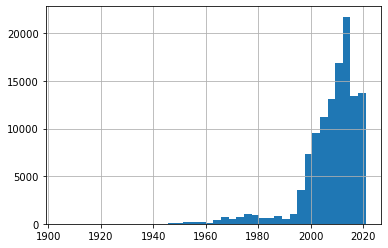

In [13]:
ufo_data[ufo_data.Year > 1900].Year.hist(bins=40)